# Modularized Evaluation

## Imports / Setup

In [1]:
import matplotlib.pyplot as plt
import matplotlib

In [2]:

matplotlib.rcParams["figure.dpi"] = 100
matplotlib.rcParams["savefig.dpi"] = 300
# load style sheet for matplotlib, a plotting library we use for 2D visualizations
plt.style.use(
    "https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"
)
plt.style.use("dark_background")
plt.rcParams.update(
    {
        "figure.facecolor": (0.22, 0.22, 0.22, 1.0),
        "axes.facecolor": (0.22, 0.22, 0.22, 1.0),
        "savefig.facecolor": (0.22, 0.22, 0.22, 1.0),
        "grid.color": (0.4, 0.4, 0.4, 1.0),
    }
)
plt.set_cmap("plasma")

<Figure size 640x480 with 0 Axes>

## Lib Imports

In [3]:
from surrogate import Surrogate
from schema import Schema

Couldn't import dot_parser, loading of dot files will not be possible.


ERROR:Schema:Failed to import a package! Be wary about continuing...
Traceback (most recent call last):
  File "/home/paperspace/ml-for-building-energy-modeling/ml-for-bem/schema.py", line 25, in <module>
    from pyumi.shoeboxer.shoebox import ShoeBox
ModuleNotFoundError: No module named 'pyumi'


## Init

In [4]:
schema = Schema()
# surrogate = Surrogate(schema=schema, checkpoint="checkpoint_saver_test/checkpoint_saver_test_202306080526_002_375000.pt") # no annual regularizer, eui's area normalized by shoebox area not zone, 0-1 normalization by full eui max not zone
# surrogate = Surrogate(schema=schema, checkpoint="separate_zone_norm_with_annual_norm/separate_zone_norm_with_annual_norm_202306110455_004_375000.pt")
# surrogate = Surrogate(schema=schema, checkpoint="learnable_pooling/learnable_pooling_202307230150_002_125000.pt")
# surrogate = Surrogate(schema=schema, checkpoint="deeper_output_net_with_leaky_relus_resumed/deeper_output_net_with_leaky_relus_resumed_202307232139_000_350000.pt")
# surrogate = Surrogate(schema=schema, checkpoint="batch_permute_test/batch_permute_test_202307242325_001_25000.pt")
surrogate = Surrogate(schema=schema, checkpoint="batch_permute_lower_lr/batch_permute_lower_lr_202307250612_002_350000.pt")

INFO:Surrogate:Using cuda for surrogate model.
INFO:Surrogate:Loading the full dataset into main RAM...
INFO:Surrogate:Finished loading the full dataset.
INFO:Surrogate:Full Input Batch Size (in storage form, not MLVec Form): 382.750176MB
INFO:Surrogate:Loading climate data...
INFO:Surrogate:Finished loading climate data.
INFO:Surrogate:Permuting dataset...
INFO:Surrogate:Dataset permuted.
INFO:Surrogate:28 building parameters per input vector
INFO:Surrogate:11 timeseries per input vector
INFO:Surrogate:4 timeseries per output vector
INFO:Surrogate:12 timesteps in output.
INFO:Surrogate:Initializing machine learning objects...
INFO:Surrogate:ML objects initialized.


## Evaluate

In [5]:
surrogate.make_model_graphs("batch_permute_lower_lr")

100%|██████████| 390/390 [12:10<00:00,  1.87s/it]


Perimeter Heating 0.9736499081415199
Perimeter Cooling 0.9711249267882578
Core Heating 0.9974236274814201
Core Cooling 0.9728028777050656


100%|██████████| 120/120 [03:41<00:00,  1.84s/it]


Perimeter Heating 0.968570800927672
Perimeter Cooling 0.9715528797397753
Core Heating 0.9954498616788676
Core Cooling 0.9825012712729901


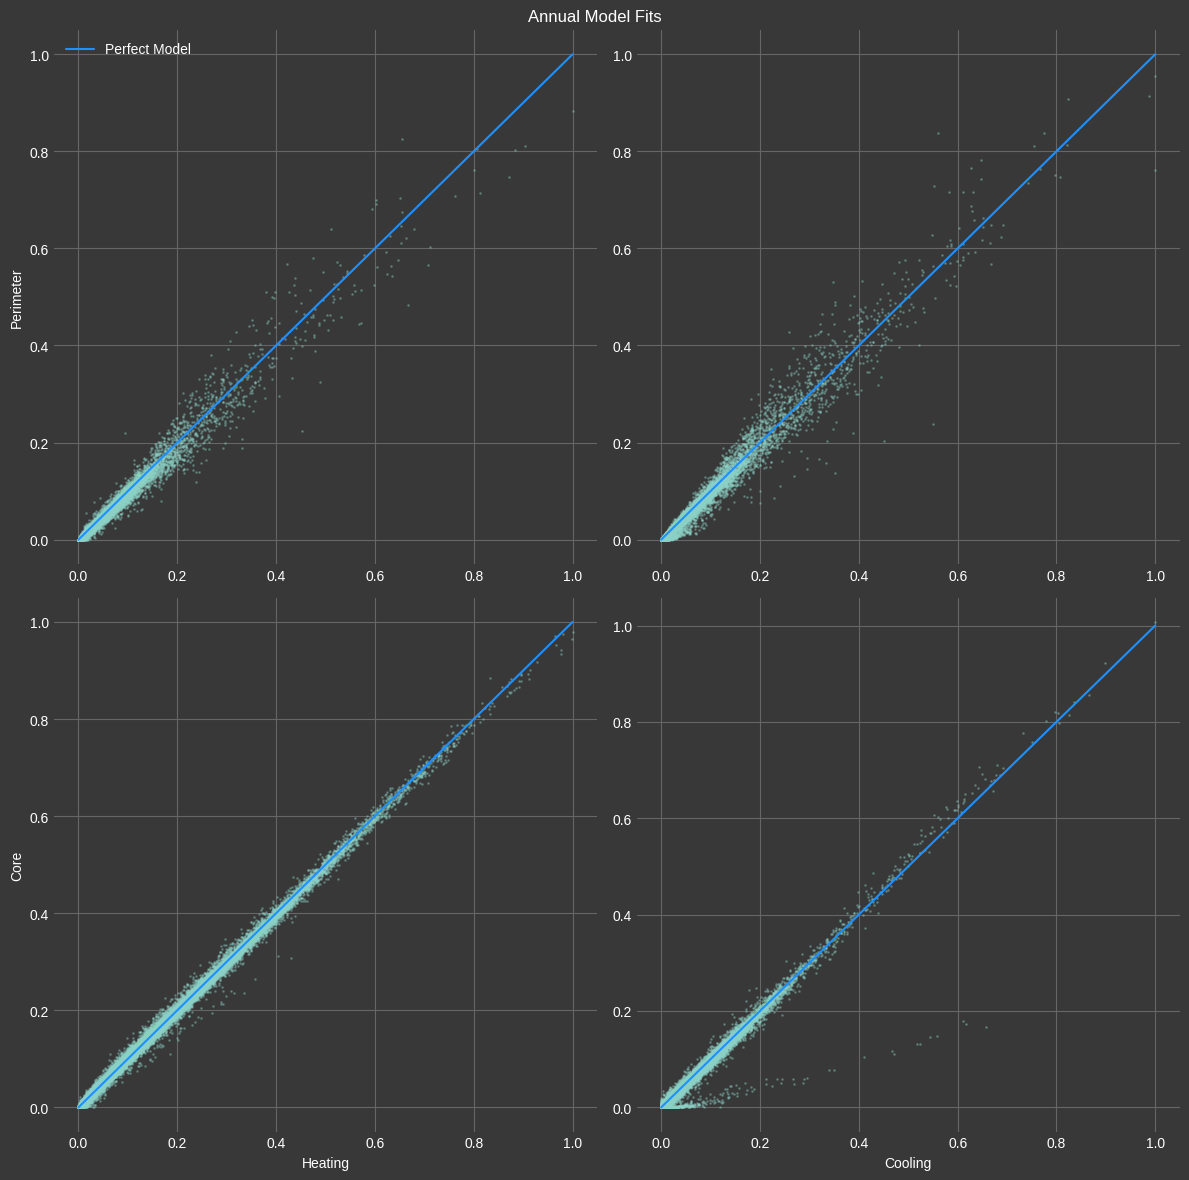

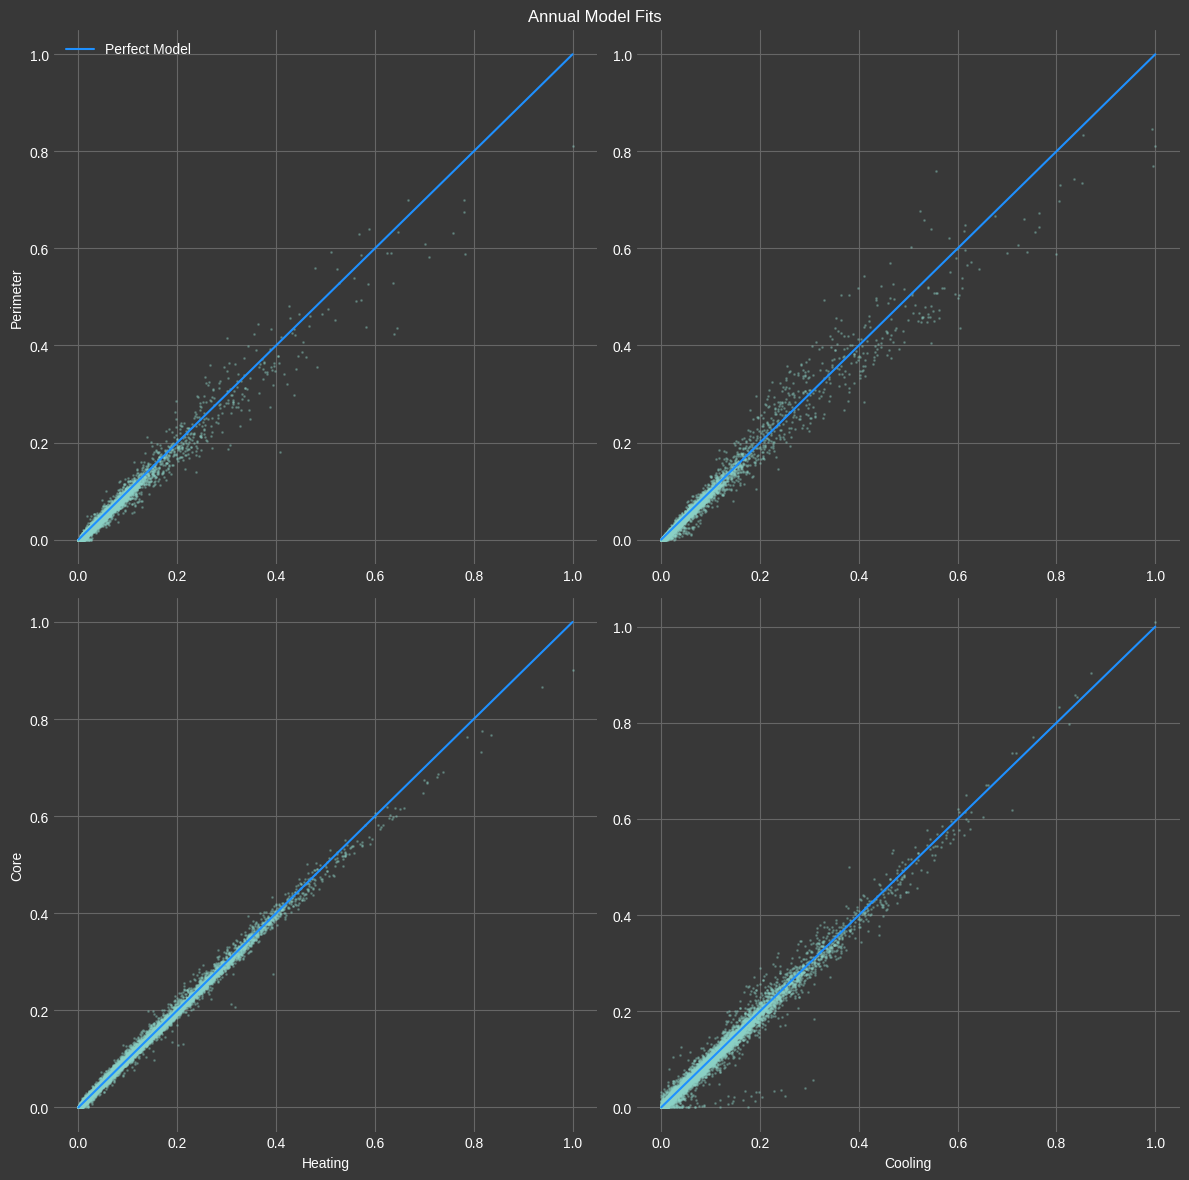

In [5]:
# BATCH PERMUTE LOWER LR
surrogate.plot_model_fits(start_ix=0,count=390000)
surrogate.plot_model_fits(start_ix=400000,count=120000)

100%|██████████| 390/390 [12:28<00:00,  1.92s/it]


Perimeter Heating 0.9605521288064748
Perimeter Cooling 0.9640553336327164
Core Heating 0.9960705805859777
Core Cooling 0.9907276003448097


100%|██████████| 120/120 [03:48<00:00,  1.90s/it]


Perimeter Heating 0.9565945709471116
Perimeter Cooling 0.9654439212130148
Core Heating 0.9947765919764242
Core Cooling 0.9864264679983896


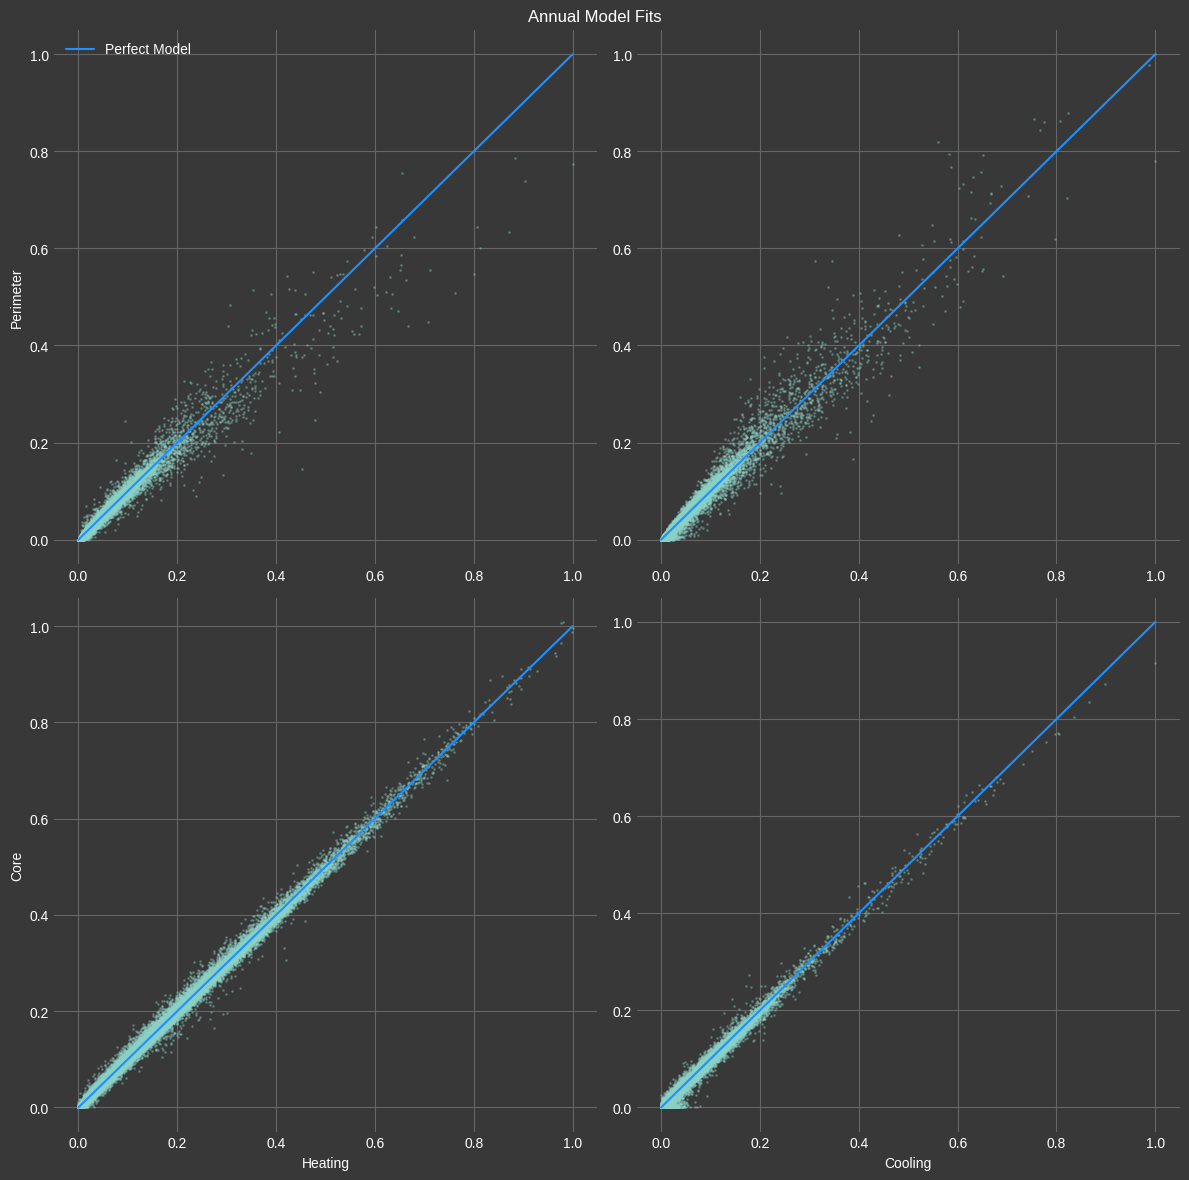

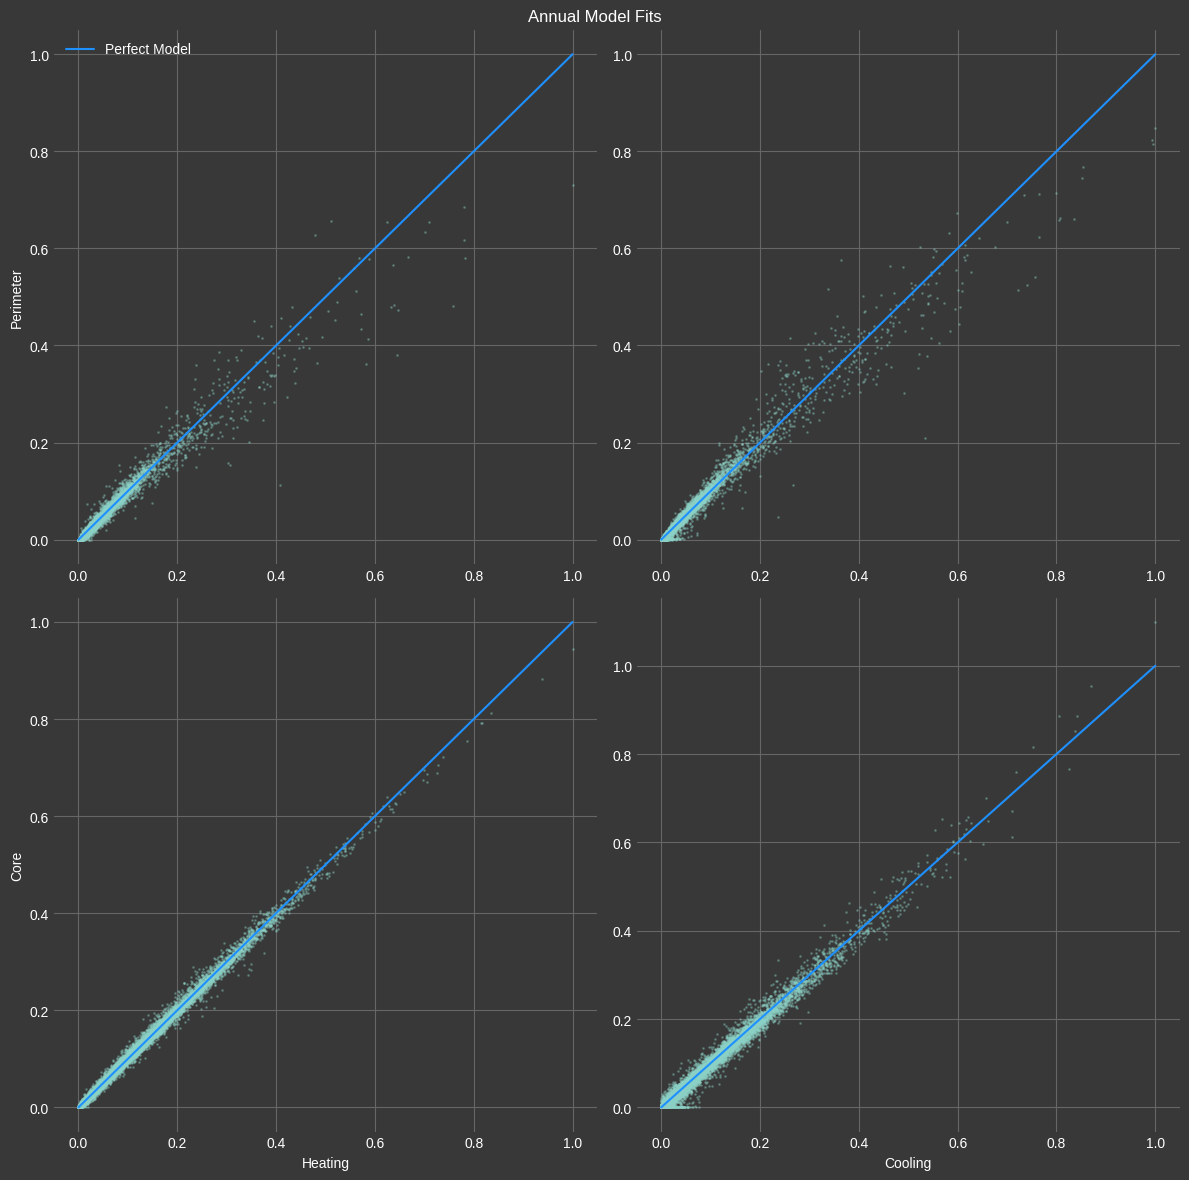

In [6]:
# BATCH PERMUTE TEST
surrogate.plot_model_fits(start_ix=0,count=390000)
surrogate.plot_model_fits(start_ix=400000,count=120000)

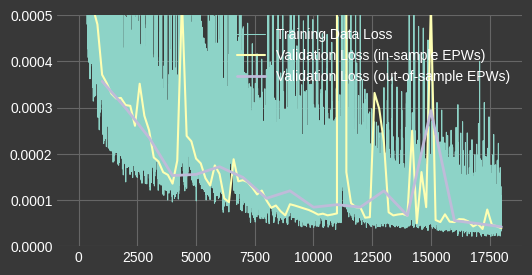

In [5]:
surrogate.plot_loss_histories(y_max=0.0005) # batch permuting

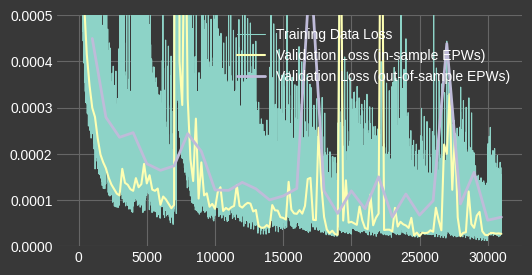

In [8]:
surrogate.plot_loss_histories(y_max=0.0005) # leaky / deeper

100%|██████████| 1/1 [00:04<00:00,  4.92s/it]


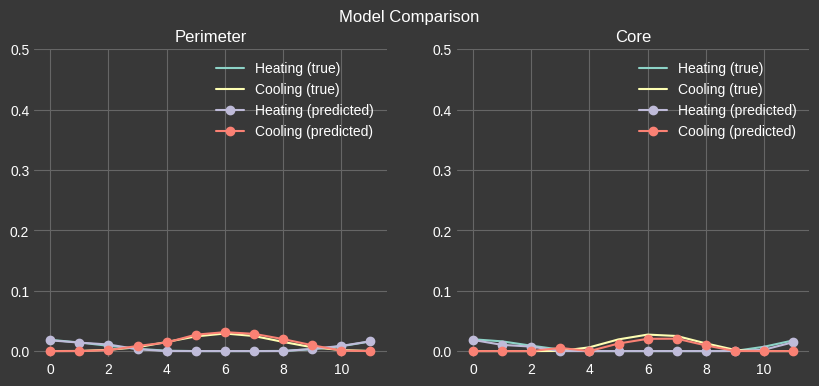

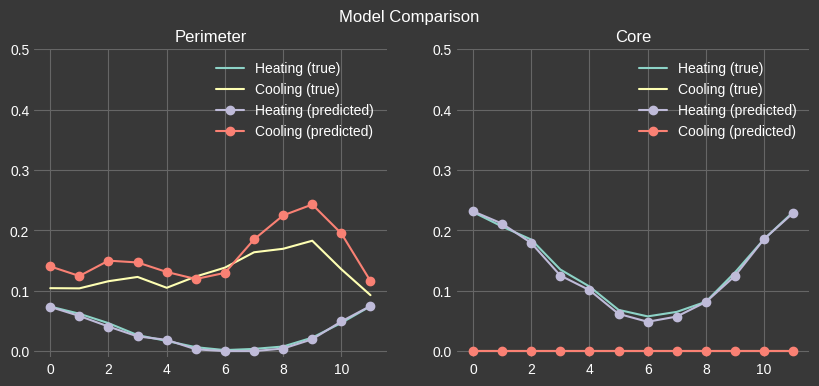

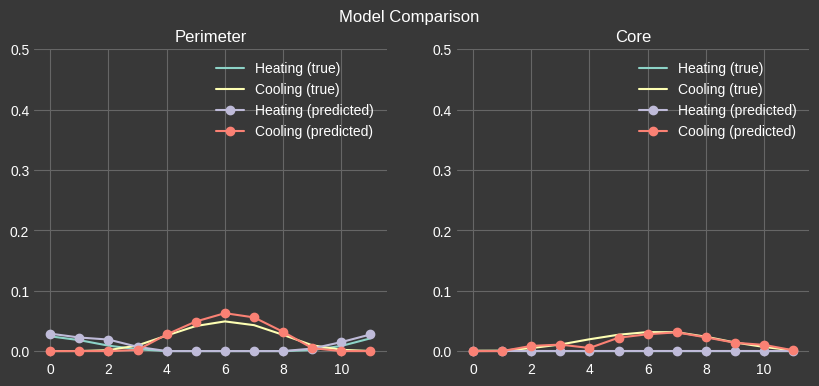

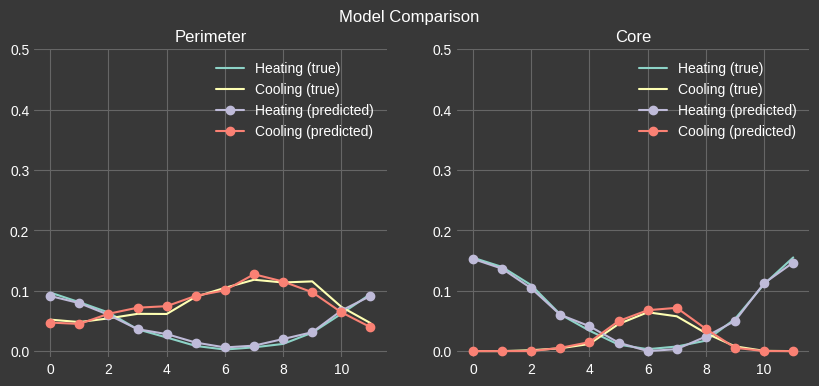

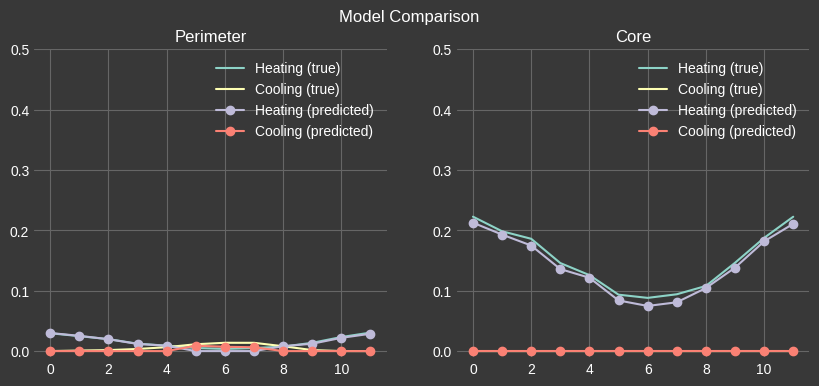

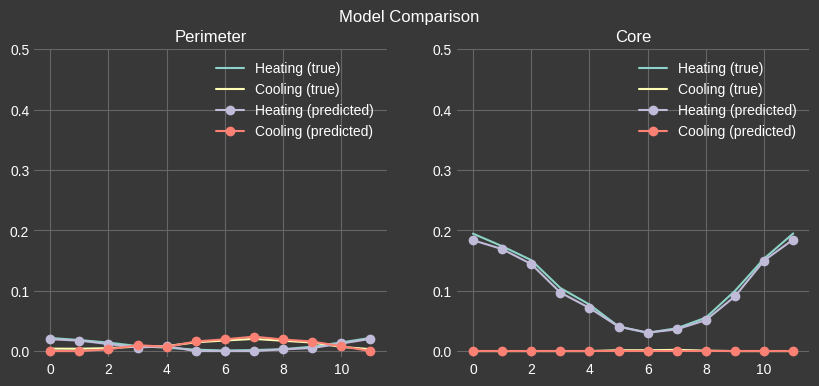

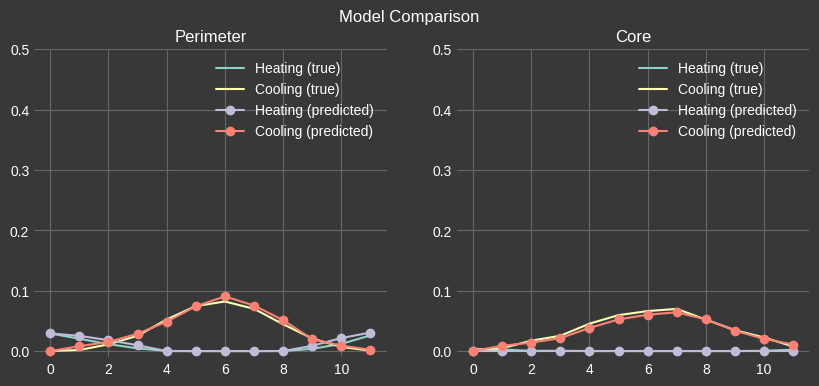

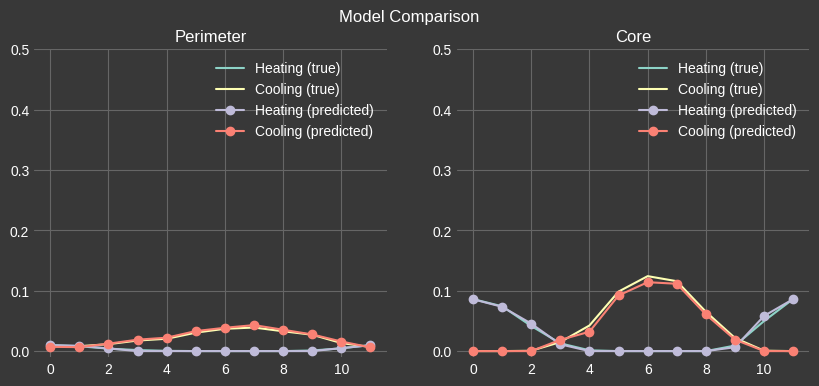

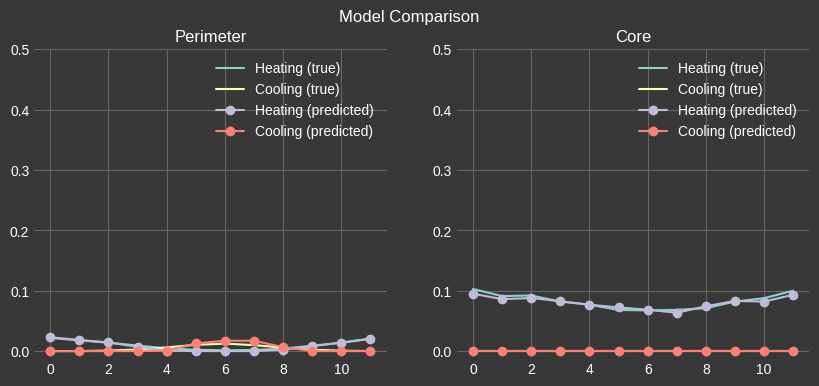

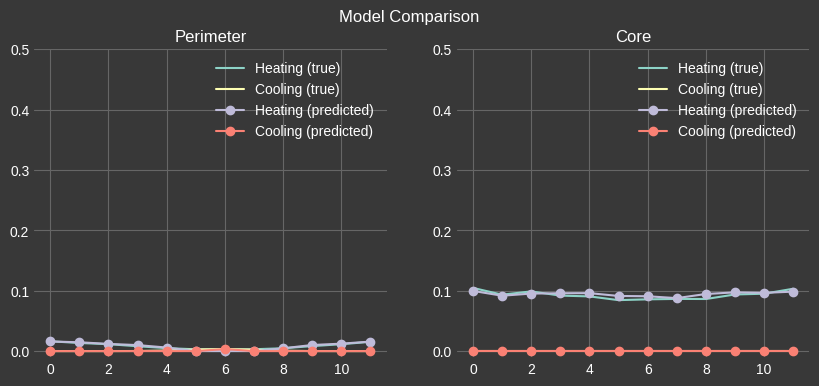

In [9]:
surrogate.plot_model_comparisons(510000,1000, plot_count=10)

100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


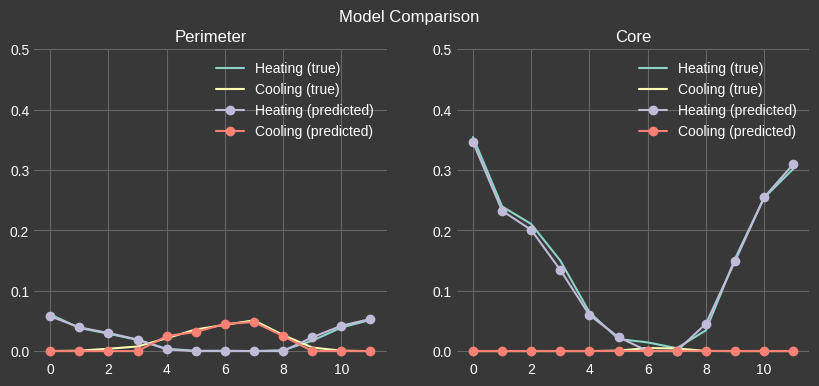

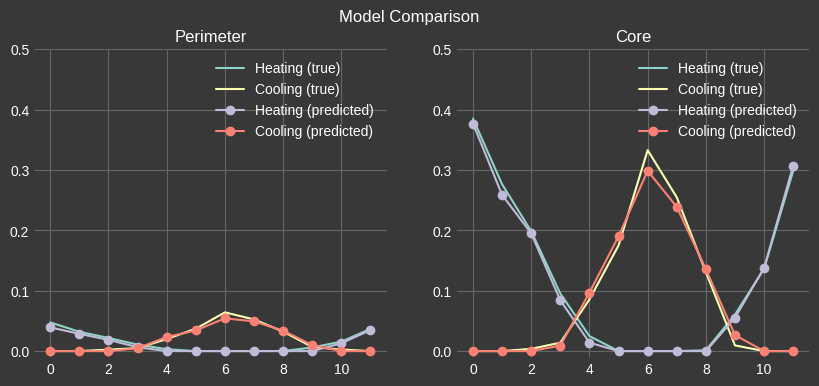

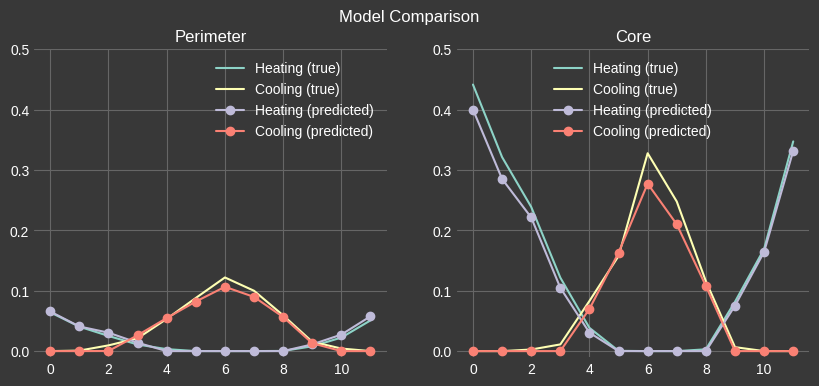

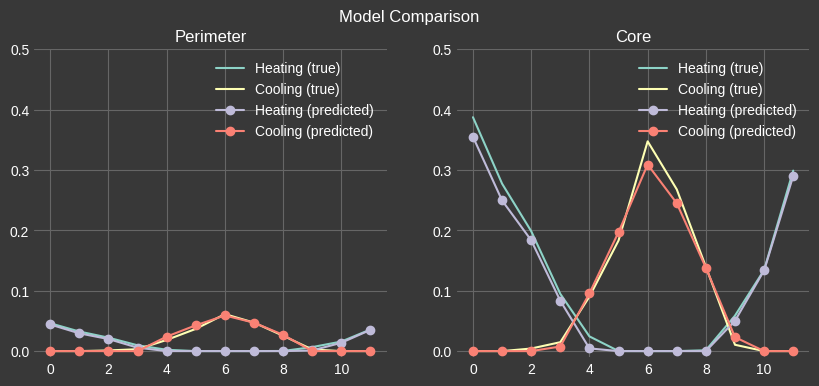

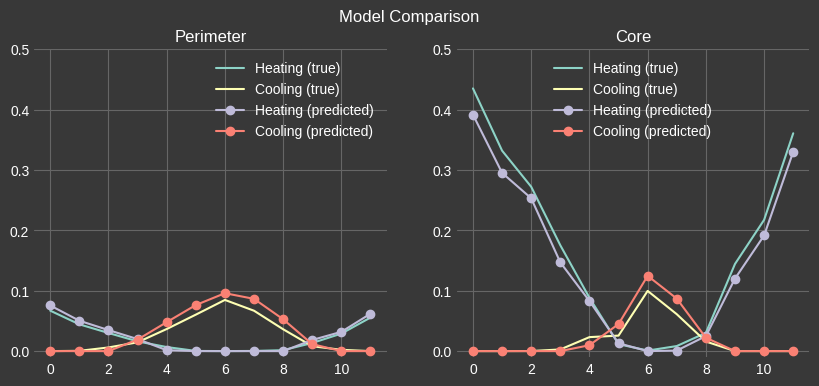

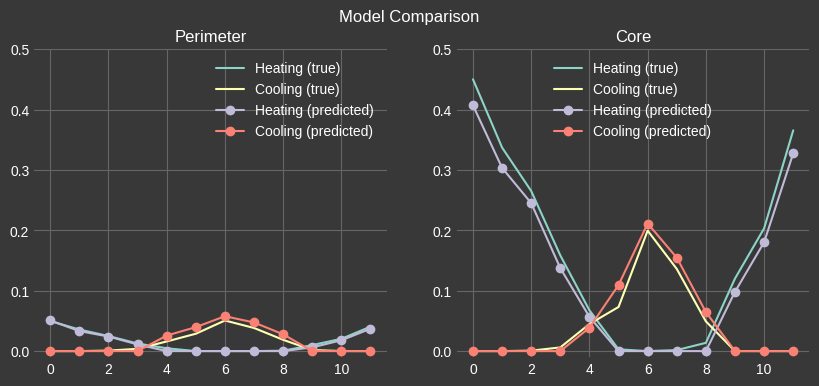

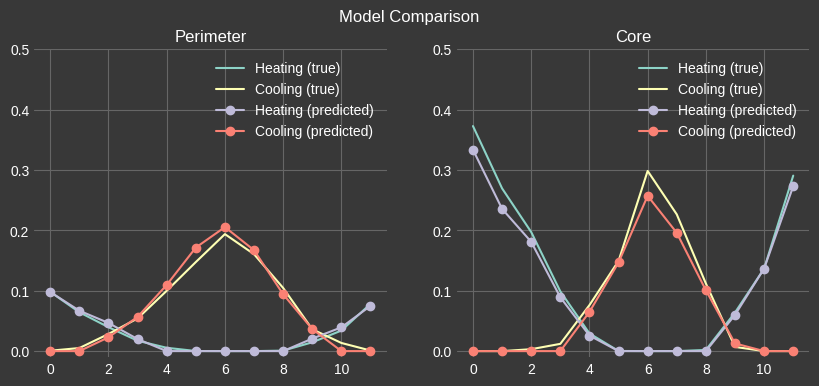

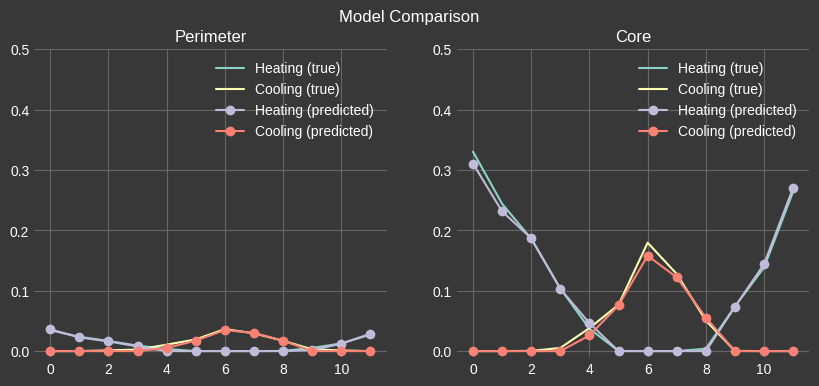

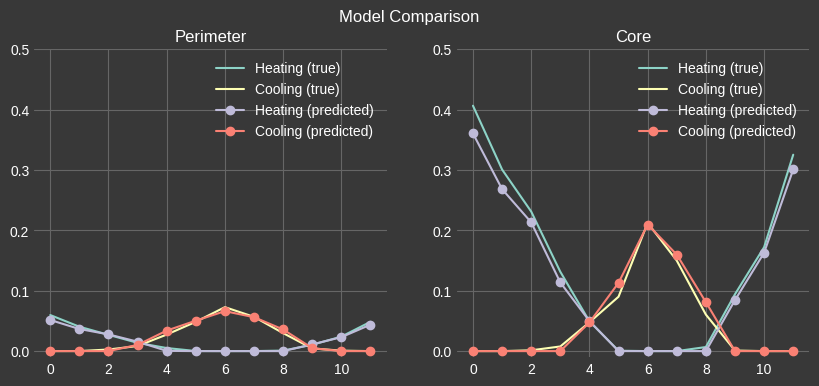

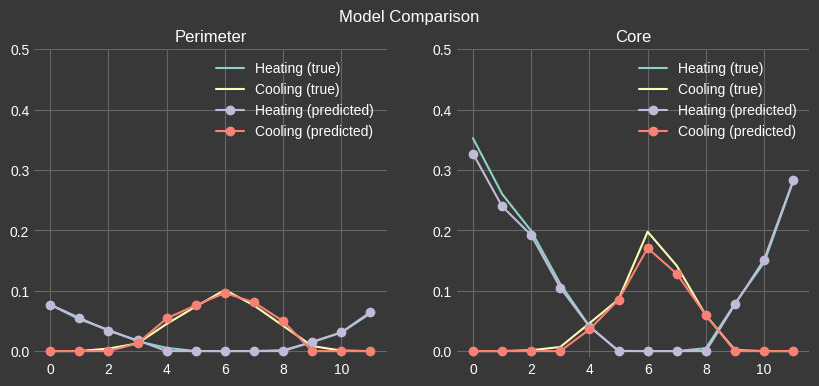

In [10]:
surrogate.plot_model_comparisons(482000,1000, plot_count=10)

100%|██████████| 390/390 [11:39<00:00,  1.79s/it]


Perimeter Heating 0.9452246159993096
Perimeter Cooling 0.94934840198514
Core Heating 0.9927571426831335
Core Cooling 0.977089038518528


100%|██████████| 120/120 [03:38<00:00,  1.82s/it]


Perimeter Heating 0.9546258688028599
Perimeter Cooling 0.9379907932411801
Core Heating 0.9914385878770418
Core Cooling 0.9814455580470299


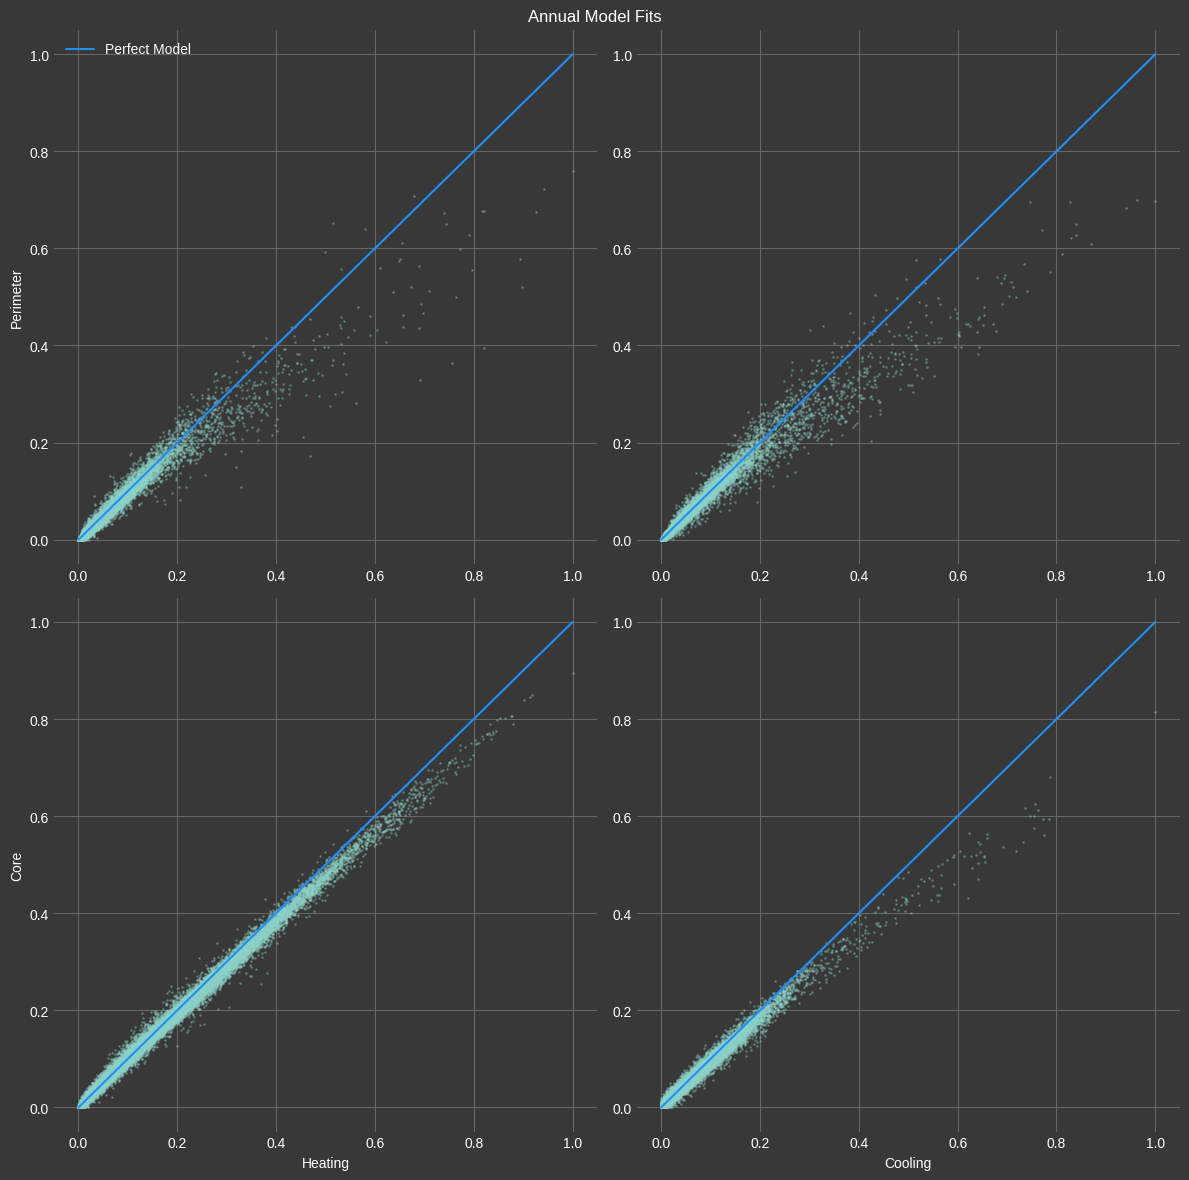

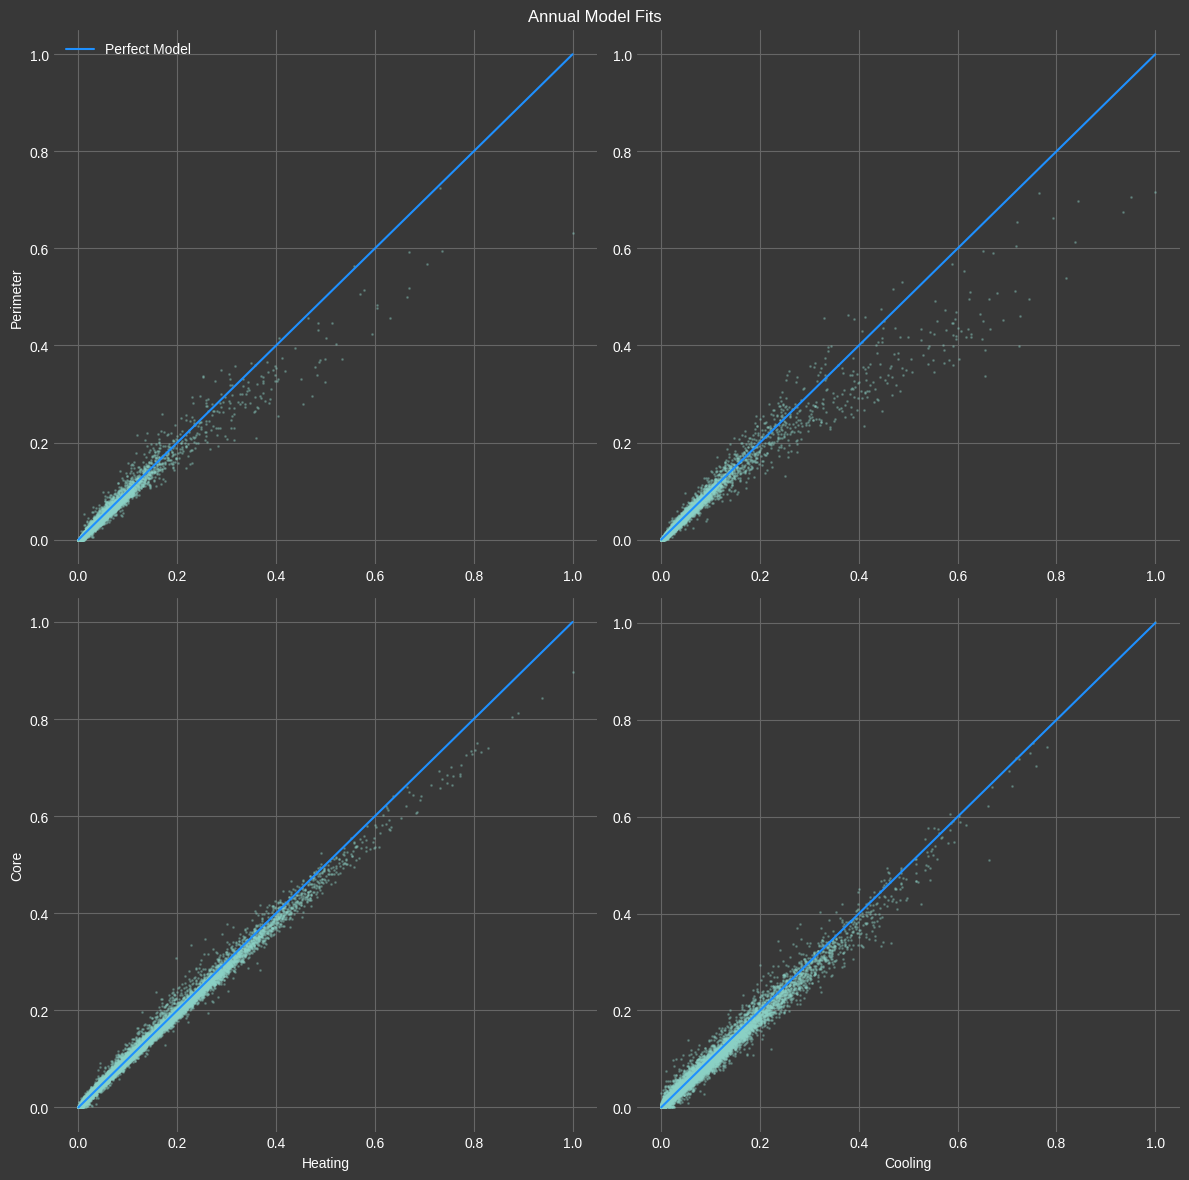

In [10]:
surrogate.plot_model_fits(start_ix=0,count=390000)
surrogate.plot_model_fits(start_ix=400000,count=120000)